In [41]:
import pandas as pd
import numpy as np
import mne
import pywt
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("C:\\Users\\a1882\\Desktop\\新建文件夹\\walkfocus_zyy_EPOCFLEX_2023.03.26T15.15.53+08.00.md.bp.csv", header=1)

In [43]:
ch_info = data.iloc[:, [0] + list(range(4, 36))]

In [44]:
ch_names = ch_info.columns[1:].tolist()

In [45]:
data_c = ch_info.iloc[:,1:]

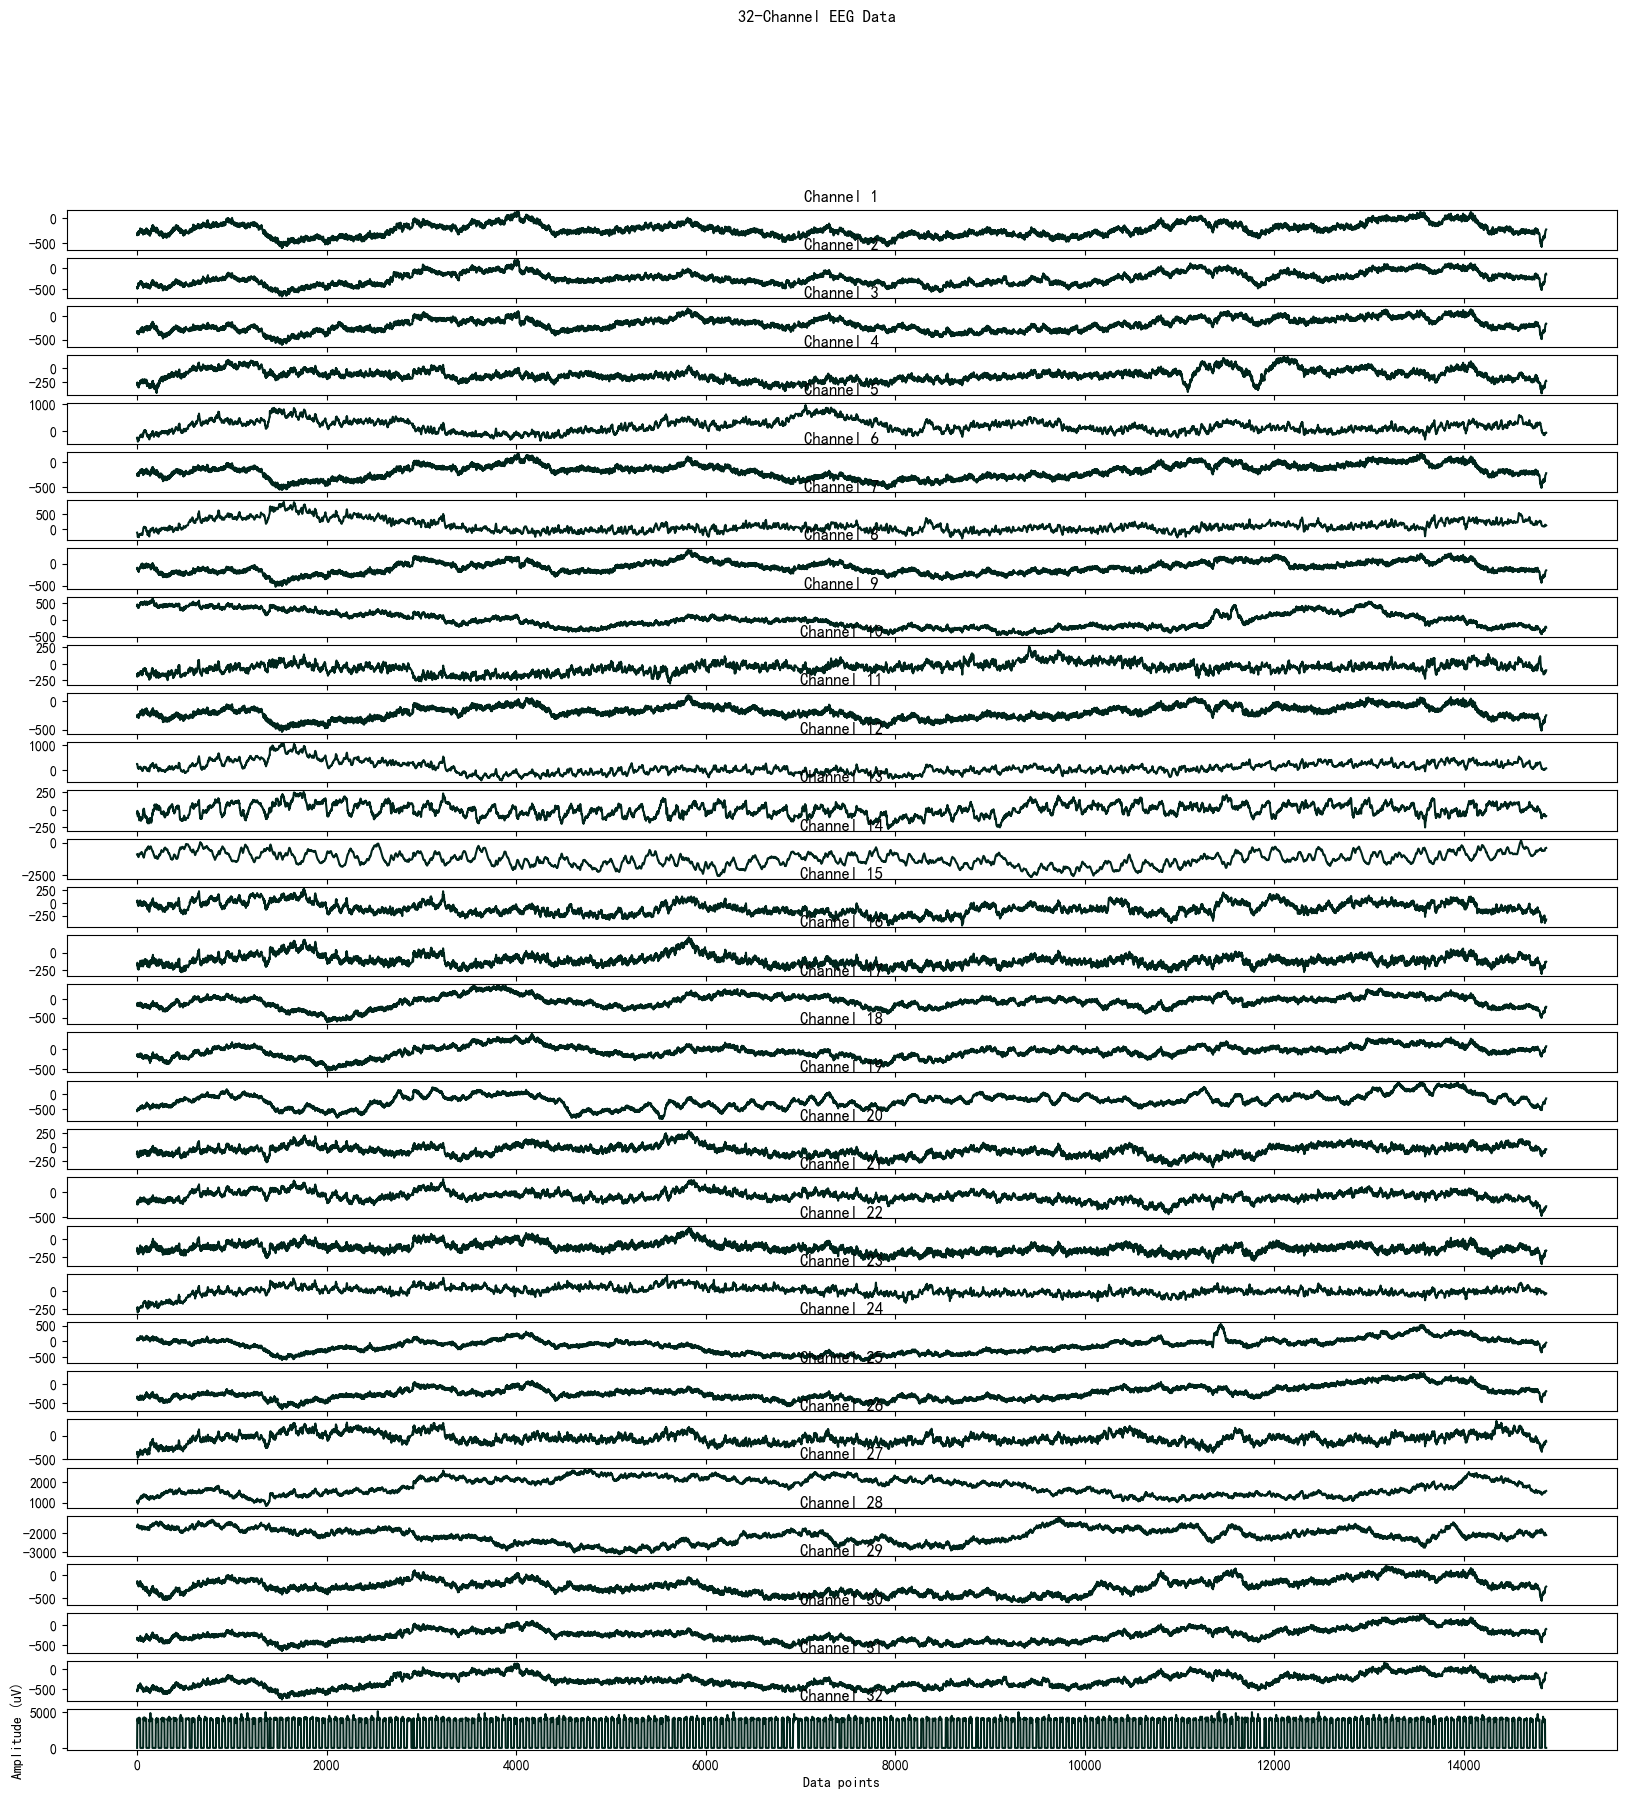

In [46]:
# 创建32通道EEG数据
data_32 = data_c

# 创建32个子图
fig, axs = plt.subplots(32, figsize=(20, 20))
hex_green = '#00251C'
#hex_orange = '#f56842'
# 绘制每个子图
for i in range(32):
    axs[i].plot(data_32.iloc[:,i],hex_green)
    axs[i].set_title(f'Channel {i+1}')


# 添加标题和轴标签
fig.suptitle('32-Channel EEG Data')
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')

# 调整子图之间的间距和边距
#plt.subplots_adjust(hspace=2)
#plt.savefig("raw_eeg.png", dpi=500, bbox_inches='tight')
plt.savefig("channel_eeg.png", dpi=500, bbox_inches='tight')
plt.show()

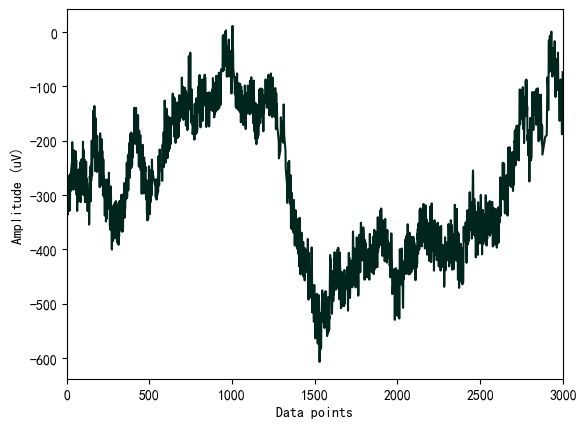

In [47]:
ch_1 = pd.DataFrame(data_32.iloc[:3000,0])
hex_green = '#00251C'
plt.plot(ch_1,hex_green)
plt.xlim(0,3000)
# plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
# plt.subplots_adjust(left=0.2, right=0.3, top=0.3, bottom=0.2)
# plt.figure(figsize=(100,10))

plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.savefig("raw_eeg_c1.png", dpi=500, bbox_inches='tight')
plt.show()

In [48]:
data = data_c.T
wavelet = pywt.Wavelet('db4')

In [49]:
filtered_data = np.zeros((32, data.shape[1]+1))
for i in range(32):
    coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)
    coeffs[-1] *= 0
#pywt.wavedec函数返回一个有序的系数数组列表，表示信号的多级离散小波分解。其中，列表中的最后一个元素是逼近系数数组，其余元素是细节系数数组
#coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)将数据data.iloc[i,:]进行了4级离散小波分解，并将结果存储在名为coeffs的变量中。然后，
#coeffs[-1] *= 0将逼近系数数组中的所有元素乘以0。
    filtered_data[i, :] = pywt.waverec(coeffs, wavelet)

In [50]:
filtered_data[0,:]

array([-314.16747272, -339.69847959, -333.17356348, ..., -229.14595324,
       -226.30747617, -226.2944486 ])

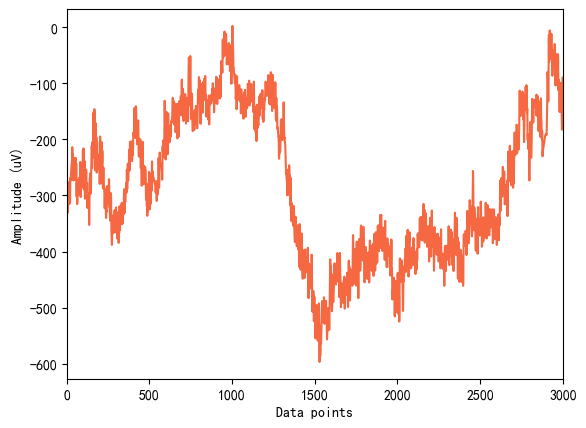

In [51]:
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:3000]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
plt.show()

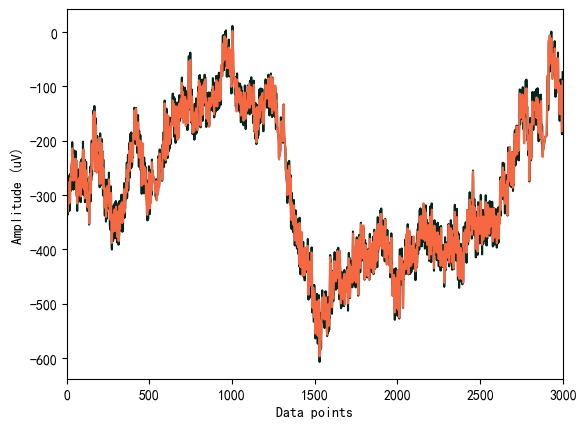

In [52]:
ch_1 = pd.DataFrame(data_32.iloc[:3000,0])
hex_green = '#00251C'
plt.plot(ch_1,hex_green)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:3000]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.savefig("contrast.png", dpi=500, bbox_inches='tight')
plt.show()

In [53]:
wavelet = pywt.Wavelet('db4')


In [54]:
coeffs = []
for i in range(32):
    wp = pywt.WaveletPacket(data=filtered_data[i,:], wavelet=wavelet, mode='symmetric', maxlevel=3)
    node = wp['a']
    coeffs.append(node.data)

In [55]:
#小波包系数
coeffs
coeffs_list = pd.DataFrame(coeffs)
coeffs_list
# print(coeffs)
#是一个包含每个通道小波包系数的列表
#其中每个元素是一个一维Numpy数组

,0,1,2,3,4,5,6,7,8,9,...,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438
0,-424.727475,-472.391735,-444.901333,-478.376881,-427.003072,-464.705885,-437.361434,-427.875817,-398.985340,-392.501100,...,-544.272343,-501.734796,-463.331014,-3.947577e+02,-3.686942e+02,-3.583069e+02,-3.478090e+02,-3.383251e+02,-3.240461e+02,-3.200160e+02
1,-650.644942,-697.990003,-662.015016,-701.128337,-652.809730,-690.597584,-651.656131,-604.711460,-544.112927,-536.268528,...,-472.331215,-404.048774,-325.865126,-2.422299e+02,-2.180203e+02,-2.097598e+02,-2.020101e+02,-1.896472e+02,-1.988760e+02,-2.041068e+02
2,-465.253295,-504.610023,-465.254357,-505.323980,-463.424789,-509.382792,-489.640546,-488.371372,-483.921096,-480.777644,...,-455.083795,-409.095451,-363.642808,-2.898590e+02,-2.575994e+02,-2.472369e+02,-2.369936e+02,-2.256826e+02,-2.193354e+02,-2.185516e+02
3,-378.532440,-400.567982,-393.591455,-408.810791,-368.695013,-429.965607,-409.459004,-439.186352,-435.400549,-404.960320,...,-496.116372,-429.085053,-409.886663,-3.608994e+02,-3.415278e+02,-3.325957e+02,-3.239013e+02,-3.130669e+02,-3.122281e+02,-3.134508e+02
4,-398.999750,-415.102815,-368.818547,-407.631274,-391.844954,-436.263163,-538.112711,-558.836087,-480.118890,-445.851762,...,-224.861545,-141.155853,-130.246824,-1.316853e+02,-1.271222e+02,-1.169496e+02,-1.069661e+02,-9.528322e+01,-9.152596e+01,-9.177026e+01
5,-323.889989,-379.546174,-344.837487,-384.226785,-330.944900,-357.261444,-342.812659,-356.340957,-330.106724,-311.567566,...,-520.705435,-481.133996,-459.194017,-3.996989e+02,-3.668493e+02,-3.564624e+02,-3.458394e+02,-3.373669e+02,-3.187715e+02,-3.129725e+02
6,-233.194250,-196.244739,-167.393887,-183.387649,-206.605325,-276.984957,-363.997476,-320.716653,-348.841491,-361.521643,...,124.766385,126.070912,158.034052,1.945535e+02,1.803895e+02,1.793833e+02,1.782643e+02,1.781675e+02,1.732750e+02,1.714465e+02
7,-138.252458,-175.767635,-163.754333,-184.879734,-136.258809,-181.210674,-192.294777,-218.487292,-204.378214,-202.922093,...,-397.342646,-375.183255,-362.084429,-2.980448e+02,-2.599508e+02,-2.503927e+02,-2.408023e+02,-2.315174e+02,-2.207615e+02,-2.180299e+02
8,612.785580,600.885794,584.306327,587.391384,625.304655,563.115933,552.471385,511.179623,524.531130,562.988805,...,-449.193360,-414.660445,-392.804555,-3.259032e+02,-3.030202e+02,-3.029529e+02,-3.035204e+02,-2.983414e+02,-3.200999e+02,-3.290286e+02
9,-265.297242,-281.083365,-228.704248,-265.648225,-275.885719,-248.577726,-210.382235,-233.707754,-230.448891,-207.185589,...,-174.804359,-148.902050,-176.433921,-1.960428e+02,-1.847335e+02,-1.772855e+02,-1.696374e+02,-1.638087e+02,-1.494218e+02,-1.448321e+02


In [56]:
#计算每个小波包系数的能量
energy = []
for i in range(32):
    energy.append([np.sum(np.square(coeffs[i]))])

In [57]:
energy

[[1028331822.4085705],
 [1225175395.2939372],
 [721721369.6053557],
 [362836473.8561616],
 [1163439544.8965783],
 [741606146.6159546],
 [699770504.6850411],
 [370380578.91712505],
 [839560008.7624764],
 [135682635.2715965],
 [711987162.6160123],
 [956621010.8215129],
 [107547243.20574933],
 [27648115453.960327],
 [362380637.1111957],
 [276859897.60800594],
 [484364725.66098344],
 [372045814.64529914],
 [1450447814.3875403],
 [170052416.82669014],
 [237392044.92731702],
 [286706634.0639814],
 [50901588.12735101],
 [984187658.4921157],
 [1206449673.5992956],
 [234566920.25244766],
 [49140157163.24005],
 [70031726453.02171],
 [1311687752.1926992],
 [1310234135.1824808],
 [1720406193.6800666],
 [118832581990.26341]]

In [58]:
#计算每个小波包系数的能量比
energy_ratio = []
for i in range(32):
    energy_ratio.append([np.sum(np.square(coeffs[i]))/np.sum(np.square(filtered_data[i,:]))])

In [59]:
energy_ratio

[[1.0005652708254495],
 [1.0010253330034495],
 [1.0009006789448547],
 [1.0012302631665324],
 [1.0003772594954818],
 [1.000493529178365],
 [1.0001742332242658],
 [1.0002238462067996],
 [1.0012158985846067],
 [1.0014450067182117],
 [1.000561139275609],
 [1.000306892293897],
 [1.0001157503051925],
 [1.0001749212332487],
 [1.0001626686858294],
 [1.0006405131962508],
 [1.0003234023724978],
 [1.0003043363029007],
 [1.001113962084456],
 [1.0003441935626152],
 [1.001233655187148],
 [1.0004602286074187],
 [1.0063190025301152],
 [1.0000191711726603],
 [1.0005767206921707],
 [1.0032276156161264],
 [1.0001473470729036],
 [1.000239552224105],
 [1.0001333608722842],
 [1.0004879414684715],
 [1.0009215586593536],
 [1.0005726271626207]]

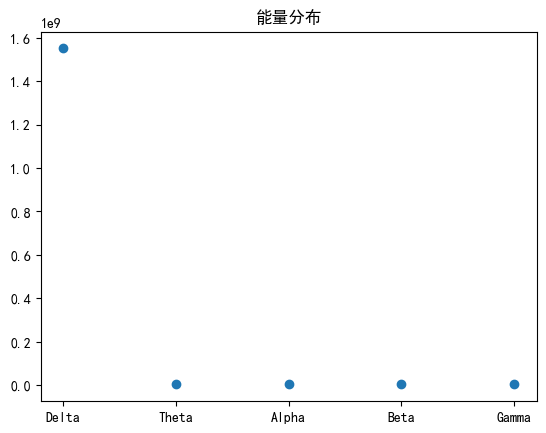

In [60]:
iter_freqs = [
    {'name': 'Delta', 'fmin': 0, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta', 'fmin': 13, 'fmax': 35},
    {'name': 'Gamma', 'fmin': 35, 'fmax': 100}
    ]

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
mne.set_log_level(False)

maxlevel = 8
fs = 128
wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet='db4', mode='symmetric', maxlevel=8)

freqTree = [node.path for node in wp.get_level(8, 'freq')]

  # 计算maxlevel最小频段的带宽
freqBand = fs / (2 ** maxlevel)
    # 定义能量数组
energy = []
for iter in range(len(iter_freqs)):
        iterEnergy = 0.0
        for i in range(len(freqTree)):
            # 第i个频段的最小频率
            bandMin = i * freqBand
            # 第i个频段的最大频率
            bandMax = bandMin + freqBand
            # 判断第i个频段是否在要分析的范围内
            if (iter_freqs[iter]['fmin'] <= bandMin and iter_freqs[iter]['fmax'] >= bandMax):
                # 计算对应频段的累加和
                iterEnergy += pow(np.linalg.norm(wp[freqTree[i]].data, ord=None), 2)
        # 保存四个频段对应的能量和
        energy.append(iterEnergy)
hex_blue = '#002fc6'
plt.plot([xLabel['name'] for xLabel in iter_freqs], energy, lw=0, marker='o',)
plt.title('能量分布')
plt.savefig("energy_distribution.png", dpi=500, bbox_inches='tight')
plt.show()

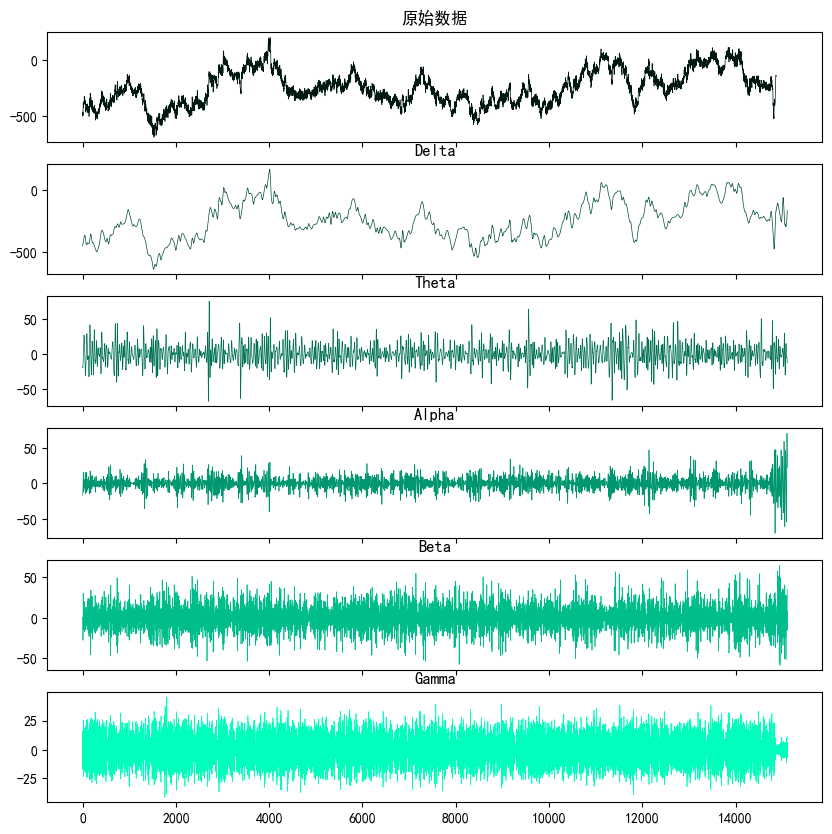

In [61]:
wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(filtered_data[1,:], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
    plt.savefig("eeg_wavelet.png", dpi=500, bbox_inches='tight')
plt.show()

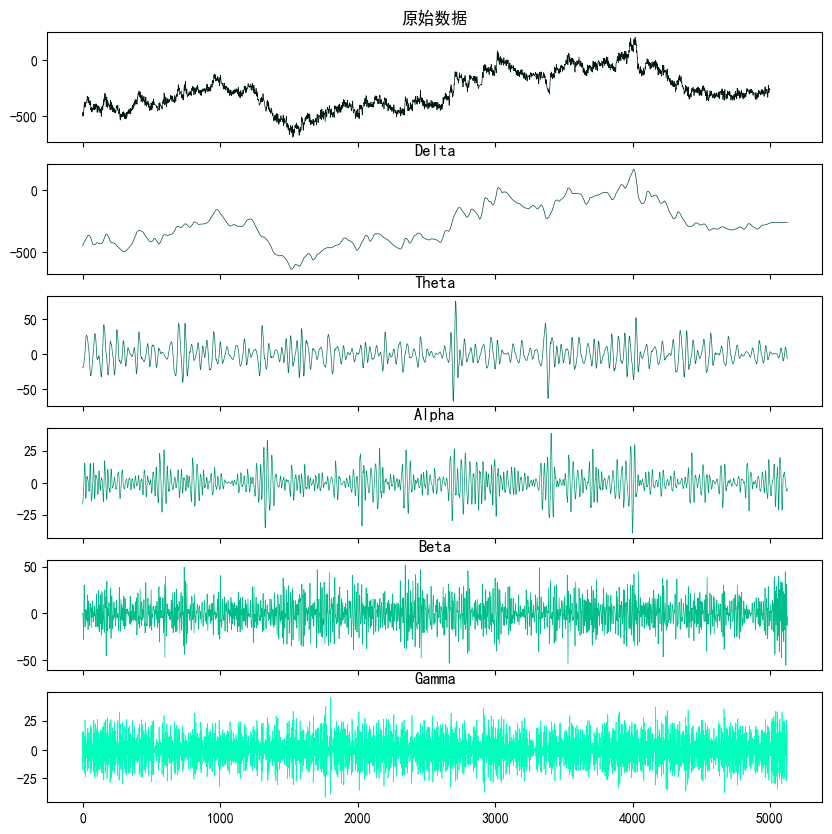

In [62]:
wp = pywt.WaveletPacket(data=filtered_data[1,:5000], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(filtered_data[1,:5000], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
    plt.savefig("eeg_wavelet_short.png", dpi=500, bbox_inches='tight')
plt.show()

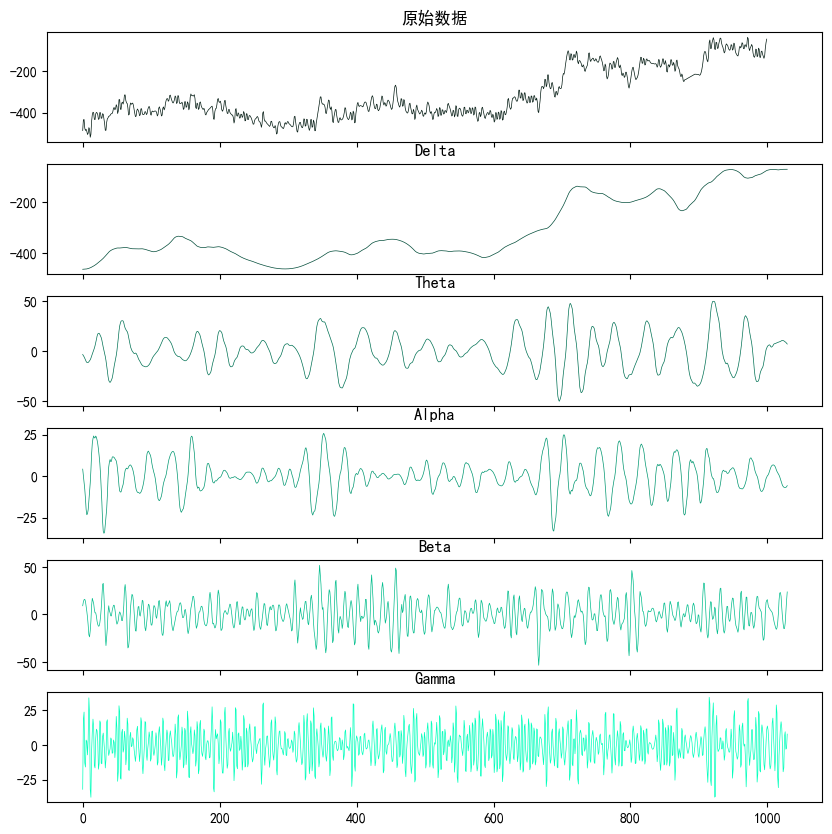

In [63]:
wp = pywt.WaveletPacket(data=filtered_data[1,2000:3000], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(filtered_data[1,2000:3000], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
    plt.savefig("eeg_wavelet_short_more.png", dpi=500, bbox_inches='tight')
plt.show()